# **MACHINE LEARNING**




## **CSC-8111**
NAME: KAILASH BALACHANDIRAN
STUDENT ID: 220243160

In [250]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import warnings 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# **Data preprocessing**

In [251]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kailash data sets/New_Tweets_test-1.csv",encoding='utf-8')
df_test = pd.read_csv("/content/drive/MyDrive/Tweets_test (1).csv",encoding='latin-1')

In [252]:
df_train.head(10)

,Unnamed: 0,tweet_id,text,airline_sentiment
0,0,570252000000000000,@AmericanAir I need refund.,negative
1,1,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,negative
2,2,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,positive
3,3,569503000000000000,@united I have never been more frustrated than...,negative
4,4,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",negative
5,5,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",positive
6,6,570116000000000000,@united frankly worse customer service ever. P...,negative
7,7,568467000000000000,@SouthwestAir you need to get your act togethe...,negative
8,8,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,negative
9,9,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,negative


In [253]:
#Features in data
df_train.columns
df_test.columns

Index(['tweet_id', 'text', 'airline_sentiment'], dtype='object')

In [254]:
#Length of the data
print('length of tain data is', len(df_train))
print('length of test data is', len(df_test))

length of tain data is 1464
length of test data is 1464


In [255]:
#Shape of the train data
df_train.shape

(1464, 4)

In [256]:
#Shape of the test data
df_test.shape

(1464, 3)

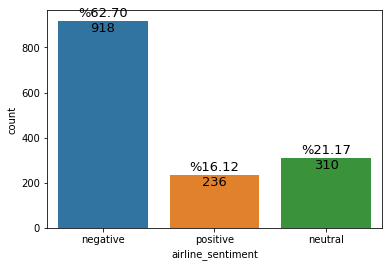

In [257]:
def labels(ax, df_train, xytext=(0, 0)):
    for bar in ax.patches: 
        ax.annotate('%{:.2f}\n{:.0f}'.format(100*bar.get_height()/len(df_train),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=13, xytext=xytext, 
                    textcoords='offset points')

ax = sns.countplot(data =df_train, x = "airline_sentiment");
labels(ax, df_train)
# inbalanced data

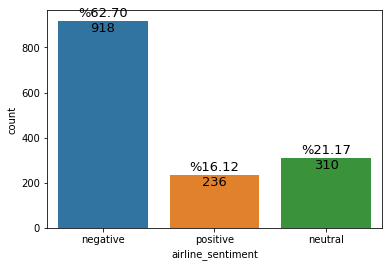

In [258]:
def labels(ax, df_test, xytext=(0, 0)):
    for bar in ax.patches: 
        ax.annotate('%{:.2f}\n{:.0f}'.format(100*bar.get_height()/len(df_test),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=13, xytext=xytext, 
                    textcoords='offset points')

ax = sns.countplot(data =df_test, x = "airline_sentiment");
labels(ax, df_test)
# inbalanced data

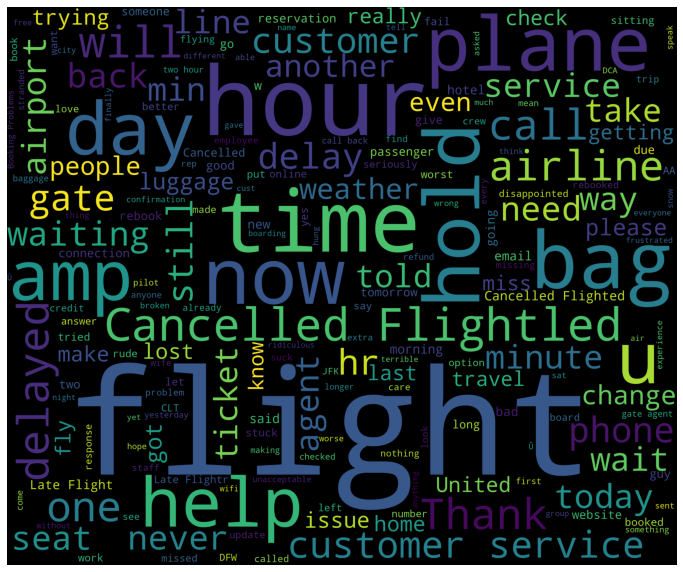

In [259]:
#World could of Negative sentiments
new_df=df_train[df_train['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

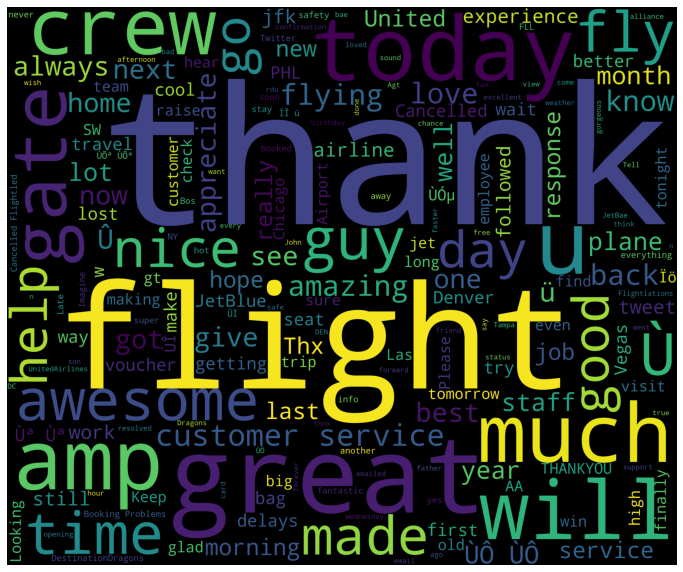

In [260]:
#World could of Positive sentiments
new_df=df_train[df_train['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

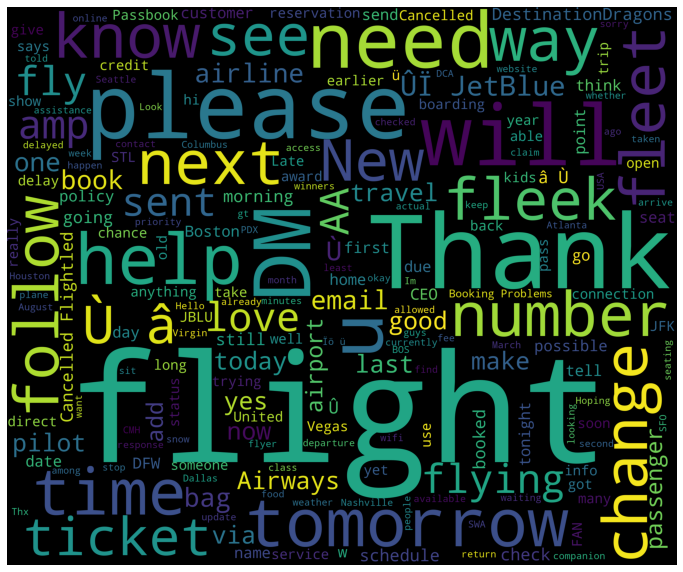

In [261]:
#World could of Neutral sentiments
new_df=df_train[df_train['airline_sentiment']=='neutral']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

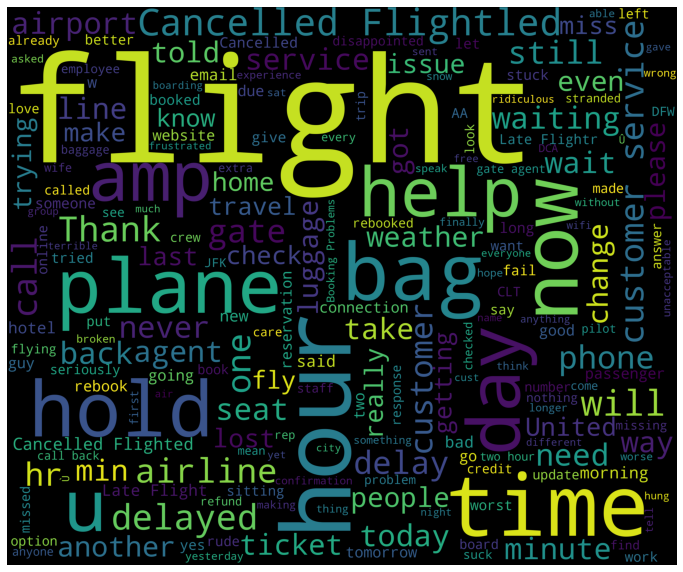

In [262]:
#World could of Negative sentiments
new_df=df_test[df_test['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

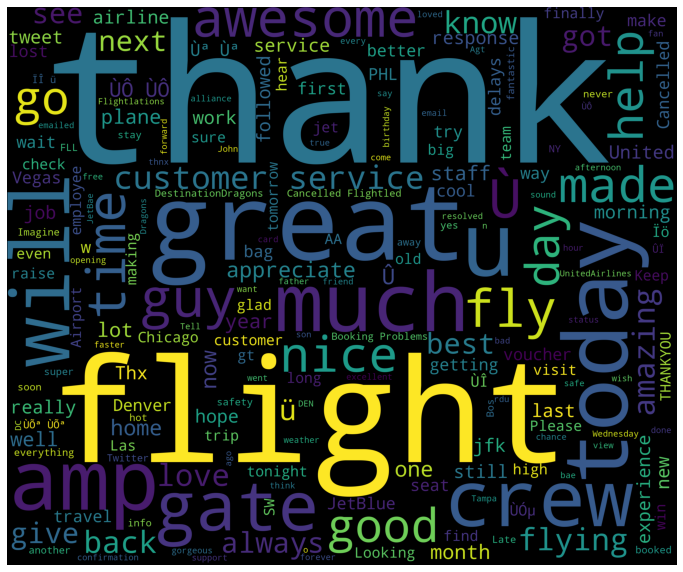

In [263]:
#World could of Positive sentiments
new_df=df_test[df_test['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

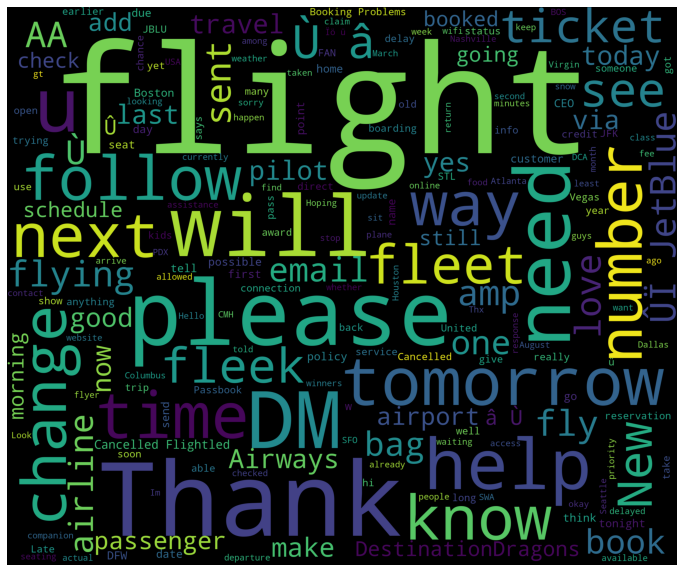

In [264]:
#World could of Neutral sentiments
new_df=df_train[df_train['airline_sentiment']=='neutral']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [265]:
print("Training Data Set Info - Total Rows | Total Columns | Total Null Values")
print(df_train.info())

Training Data Set Info - Total Rows | Total Columns | Total Null Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1464 non-null   int64 
 1   tweet_id           1464 non-null   int64 
 2   text               1464 non-null   object
 3   airline_sentiment  1464 non-null   object
dtypes: int64(2), object(2)
memory usage: 45.9+ KB
None


In [266]:
print("Test Data Set Info - Total Rows | Total Columns | Total Null Values")
print(df_test.info())

Test Data Set Info - Total Rows | Total Columns | Total Null Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           1464 non-null   int64 
 1   text               1464 non-null   object
 2   airline_sentiment  1464 non-null   object
dtypes: int64(1), object(2)
memory usage: 34.4+ KB
None


In [267]:
df_train['airline_sentiment'].replace(['negative','neutral','positive'],[0,1,1],inplace=True)
df_test['airline_sentiment'].replace(['negative','neutral','positive'],[0,1,1],inplace=True)

In [268]:
df_combine = df_train.append(df_test, ignore_index = True, sort = False)
df_combine.head()

,Unnamed: 0,tweet_id,text,airline_sentiment
0,0.0,570252000000000000,@AmericanAir I need refund.,0
1,1.0,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,0
2,2.0,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,1
3,3.0,569503000000000000,@united I have never been more frustrated than...,0
4,4.0,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",0


In [269]:
print("Combine Data Set Info - Total Rows | Total Columns | Total Null Values")
print(df_combine.info())

Combine Data Set Info - Total Rows | Total Columns | Total Null Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1464 non-null   float64
 1   tweet_id           2928 non-null   int64  
 2   text               2928 non-null   object 
 3   airline_sentiment  2928 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 91.6+ KB
None


In [270]:
print("""Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)""")

Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)


In [271]:
from html.parser import HTMLParser
html_parser = HTMLParser()

In [272]:
df_combine['clean_tweet'] = df_combine['text'].apply(lambda x: html_parser.unescape(x))
df_combine.head(10)

,Unnamed: 0,tweet_id,text,airline_sentiment,clean_tweet
0,0.0,570252000000000000,@AmericanAir I need refund.,0,@AmericanAir I need refund.
1,1.0,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,0,@USAirways after 3 Cancelled Flightlations and...
2,2.0,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,1,@JetBlue thanks so much. Can't wait to fly wit...
3,3.0,569503000000000000,@united I have never been more frustrated than...,0,@united I have never been more frustrated than...
4,4.0,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",0,"@USAirways - the worst! Hold time crazy, agent..."
5,5.0,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",1,"@AmericanAir My pleasure, next AA flight - thi..."
6,6.0,570116000000000000,@united frankly worse customer service ever. P...,0,@united frankly worse customer service ever. P...
7,7.0,568467000000000000,@SouthwestAir you need to get your act togethe...,0,@SouthwestAir you need to get your act togethe...
8,8.0,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,0,@AmericanAir AND they Cancelled Flighted my fl...
9,9.0,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,0,@JetBlue flight 691 from bos to Tampa takeoff ...


In [273]:
def rem_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [274]:
df_combine['clean_tweet'] = np.vectorize(rem_pattern)(df_combine['clean_tweet'], "@[\w]*")
df_combine.head(10)

,Unnamed: 0,tweet_id,text,airline_sentiment,clean_tweet
0,0.0,570252000000000000,@AmericanAir I need refund.,0,I need refund.
1,1.0,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,0,"after 3 Cancelled Flightlations and a delay, ..."
2,2.0,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,1,thanks so much. Can't wait to fly with you gu...
3,3.0,569503000000000000,@united I have never been more frustrated than...,0,I have never been more frustrated than my con...
4,4.0,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",0,"- the worst! Hold time crazy, agents horrible..."
5,5.0,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",1,"My pleasure, next AA flight - this Wednesday ..."
6,6.0,570116000000000000,@united frankly worse customer service ever. P...,0,frankly worse customer service ever. Problems...
7,7.0,568467000000000000,@SouthwestAir you need to get your act togethe...,0,you need to get your act together. You new th...
8,8.0,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,0,AND they Cancelled Flighted my flight and lef...
9,9.0,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,0,flight 691 from bos to Tampa takeoff 40 min L...


In [275]:
df_combine['clean_tweet'] = df_combine['clean_tweet'].apply(lambda x: x.lower())
df_combine.head(10)

,Unnamed: 0,tweet_id,text,airline_sentiment,clean_tweet
0,0.0,570252000000000000,@AmericanAir I need refund.,0,i need refund.
1,1.0,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,0,"after 3 cancelled flightlations and a delay, ..."
2,2.0,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,1,thanks so much. can't wait to fly with you gu...
3,3.0,569503000000000000,@united I have never been more frustrated than...,0,i have never been more frustrated than my con...
4,4.0,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",0,"- the worst! hold time crazy, agents horrible..."
5,5.0,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",1,"my pleasure, next aa flight - this wednesday ..."
6,6.0,570116000000000000,@united frankly worse customer service ever. P...,0,frankly worse customer service ever. problems...
7,7.0,568467000000000000,@SouthwestAir you need to get your act togethe...,0,you need to get your act together. you new th...
8,8.0,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,0,and they cancelled flighted my flight and lef...
9,9.0,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,0,flight 691 from bos to tampa takeoff 40 min l...


In [276]:
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [277]:
def look_up_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [278]:
df_combine['clean_tweet'] = df_combine['clean_tweet'].apply(lambda x: look_up_dict(x,apostrophe_dict))
df_combine.head(10)

,Unnamed: 0,tweet_id,text,airline_sentiment,clean_tweet
0,0.0,570252000000000000,@AmericanAir I need refund.,0,i need refund.
1,1.0,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,0,"after 3 cancelled flightlations and a delay, ..."
2,2.0,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,1,thanks so much. cannot wait to fly with you g...
3,3.0,569503000000000000,@united I have never been more frustrated than...,0,i have never been more frustrated than my con...
4,4.0,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",0,"- the worst! hold time crazy, agents horrible..."
5,5.0,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",1,"my pleasure, next aa flight - this wednesday ..."
6,6.0,570116000000000000,@united frankly worse customer service ever. P...,0,frankly worse customer service ever. problems...
7,7.0,568467000000000000,@SouthwestAir you need to get your act togethe...,0,you need to get your act together. you new th...
8,8.0,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,0,and they cancelled flighted my flight and lef...
9,9.0,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,0,flight 691 from bos to tampa takeoff 40 min l...


In [279]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [280]:
df_combine['clean_tweet'] = df_combine['clean_tweet'].apply(lambda x: look_up_dict(x,short_word_dict))
df_combine.head(10)

,Unnamed: 0,tweet_id,text,airline_sentiment,clean_tweet
0,0.0,570252000000000000,@AmericanAir I need refund.,0,i need refund.
1,1.0,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,0,"after 3 cancelled flightlations and a delay, ..."
2,2.0,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,1,thanks so much. cannot wait to fly with you g...
3,3.0,569503000000000000,@united I have never been more frustrated than...,0,i have never been more frustrated than my con...
4,4.0,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",0,"- the worst! hold time crazy, agents horrible..."
5,5.0,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",1,"my pleasure, next aa flight - this wednesday ..."
6,6.0,570116000000000000,@united frankly worse customer service ever. P...,0,frankly worse customer service ever. problems...
7,7.0,568467000000000000,@SouthwestAir you need to get your act togethe...,0,you need to get your act together. you new th...
8,8.0,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,0,and they cancelled flighted my flight and lef...
9,9.0,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,0,flight 691 from bos to tampa takeoff 40 min l...


In [281]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
emoticon_dict

{':)': 'happy',
 ':‑)': 'happy',
 ':-]': 'happy',
 ':-3': 'happy',
 ':->': 'happy',
 '8-)': 'happy',
 ':-}': 'happy',
 ':o)': 'happy',
 ':c)': 'happy',
 ':^)': 'happy',
 '=]': 'happy',
 '=)': 'happy',
 '<3': 'happy',
 ':-(': 'sad',
 ':(': 'sad',
 ':c': 'sad',
 ':<': 'sad',
 ':[': 'sad',
 '>:[': 'sad',
 ':{': 'sad',
 '>:(': 'sad',
 ':-c': 'sad',
 ':-< ': 'sad',
 ':-[': 'sad',
 ':-||': 'sad'}

In [282]:
df_combine['clean_tweet'] = df_combine['clean_tweet'].apply(lambda x: look_up_dict(x,emoticon_dict))
df_combine.head(10)

,Unnamed: 0,tweet_id,text,airline_sentiment,clean_tweet
0,0.0,570252000000000000,@AmericanAir I need refund.,0,i need refund.
1,1.0,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,0,"after 3 cancelled flightlations and a delay, ..."
2,2.0,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,1,thanks so much. cannot wait to fly with you g...
3,3.0,569503000000000000,@united I have never been more frustrated than...,0,i have never been more frustrated than my con...
4,4.0,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",0,"- the worst! hold time crazy, agents horrible..."
5,5.0,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",1,"my pleasure, next aa flight - this wednesday ..."
6,6.0,570116000000000000,@united frankly worse customer service ever. P...,0,frankly worse customer service ever. problems...
7,7.0,568467000000000000,@SouthwestAir you need to get your act togethe...,0,you need to get your act together. you new th...
8,8.0,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,0,and they cancelled flighted my flight and lef...
9,9.0,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,0,flight 691 from bos to tampa takeoff 40 min l...


In [283]:
df_combine['clean_tweet'] = df_combine['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
df_combine.head(10)

,Unnamed: 0,tweet_id,text,airline_sentiment,clean_tweet
0,0.0,570252000000000000,@AmericanAir I need refund.,0,i need refund
1,1.0,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,0,after 3 cancelled flightlations and a delay ...
2,2.0,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,1,thanks so much cannot wait to fly with you g...
3,3.0,569503000000000000,@united I have never been more frustrated than...,0,i have never been more frustrated than my con...
4,4.0,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",0,the worst hold time crazy agents horrible...
5,5.0,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",1,my pleasure next aa flight this wednesday ...
6,6.0,570116000000000000,@united frankly worse customer service ever. P...,0,frankly worse customer service ever problems...
7,7.0,568467000000000000,@SouthwestAir you need to get your act togethe...,0,you need to get your act together you new th...
8,8.0,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,0,and they cancelled flighted my flight and lef...
9,9.0,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,0,flight 691 from bos to tampa takeoff 40 min l...


In [284]:
df_combine['clean_tweet'] = df_combine['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df_combine.head(10)

,Unnamed: 0,tweet_id,text,airline_sentiment,clean_tweet
0,0.0,570252000000000000,@AmericanAir I need refund.,0,i need refund
1,1.0,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,0,after 3 cancelled flightlations and a delay ...
2,2.0,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,1,thanks so much cannot wait to fly with you g...
3,3.0,569503000000000000,@united I have never been more frustrated than...,0,i have never been more frustrated than my con...
4,4.0,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",0,the worst hold time crazy agents horrible...
5,5.0,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",1,my pleasure next aa flight this wednesday ...
6,6.0,570116000000000000,@united frankly worse customer service ever. P...,0,frankly worse customer service ever problems...
7,7.0,568467000000000000,@SouthwestAir you need to get your act togethe...,0,you need to get your act together you new th...
8,8.0,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,0,and they cancelled flighted my flight and lef...
9,9.0,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,0,flight 691 from bos to tampa takeoff 40 min l...


In [285]:
df_combine['clean_tweet'] = df_combine['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df_combine.head(10)

,Unnamed: 0,tweet_id,text,airline_sentiment,clean_tweet
0,0.0,570252000000000000,@AmericanAir I need refund.,0,i need refund
1,1.0,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,0,after cancelled flightlations and a delay ...
2,2.0,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,1,thanks so much cannot wait to fly with you g...
3,3.0,569503000000000000,@united I have never been more frustrated than...,0,i have never been more frustrated than my con...
4,4.0,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",0,the worst hold time crazy agents horrible...
5,5.0,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",1,my pleasure next aa flight this wednesday ...
6,6.0,570116000000000000,@united frankly worse customer service ever. P...,0,frankly worse customer service ever problems...
7,7.0,568467000000000000,@SouthwestAir you need to get your act togethe...,0,you need to get your act together you new th...
8,8.0,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,0,and they cancelled flighted my flight and lef...
9,9.0,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,0,flight from bos to tampa takeoff min l...


In [286]:
df_combine['clean_tweet'] = df_combine['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df_combine['clean_tweet'][0:5]

0                                          need refund
1    after cancelled flightlations and delay causin...
2    thanks so much cannot wait to fly with you guy...
3    have never been more frustrated than my conver...
4    the worst hold time crazy agents horrible no a...
Name: clean_tweet, dtype: object

In [287]:
from textblob import TextBlob

In [288]:
blob = TextBlob("Why are you stting on this bech??") 
print(blob.correct())

Why are you sitting on this bench??


In [289]:
blob.words[3].spellcheck()

[('sitting', 0.8078078078078078),
 ('setting', 0.11411411411411411),
 ('string', 0.036036036036036036),
 ('sting', 0.02702702702702703),
 ('stating', 0.015015015015015015)]

In [290]:
text = df_combine['clean_tweet'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

0                                          need refund
1    after canceled flightlations and delay causing...
2    thanks so much cannot wait to fly with you gun...
3    have never been more frustrated than my conver...
4    the worst hold time crazy agents horrible no a...
5    my pleasure next a flight this wednesday to mi...
6    frankly worse customer service ever problems w...
7    you need to get your act together you new this...
8    and they canceled lighted my flight and left m...
9      flight from boy to camp takeoff min late flight
Name: clean_tweet, dtype: object

In [291]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [292]:
df_combine['tweet_token'] = df_combine['clean_tweet'].apply(lambda x: word_tokenize(x))
df_combine.head(10)

,Unnamed: 0,tweet_id,text,airline_sentiment,clean_tweet,tweet_token
0,0.0,570252000000000000,@AmericanAir I need refund.,0,need refund,"[need, refund]"
1,1.0,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,0,after cancelled flightlations and delay causin...,"[after, cancelled, flightlations, and, delay, ..."
2,2.0,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,1,thanks so much cannot wait to fly with you guy...,"[thanks, so, much, can, not, wait, to, fly, wi..."
3,3.0,569503000000000000,@united I have never been more frustrated than...,0,have never been more frustrated than my conver...,"[have, never, been, more, frustrated, than, my..."
4,4.0,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",0,the worst hold time crazy agents horrible no a...,"[the, worst, hold, time, crazy, agents, horrib..."
5,5.0,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",1,my pleasure next aa flight this wednesday to m...,"[my, pleasure, next, aa, flight, this, wednesd..."
6,6.0,570116000000000000,@united frankly worse customer service ever. P...,0,frankly worse customer service ever problems w...,"[frankly, worse, customer, service, ever, prob..."
7,7.0,568467000000000000,@SouthwestAir you need to get your act togethe...,0,you need to get your act together you new this...,"[you, need, to, get, your, act, together, you,..."
8,8.0,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,0,and they cancelled flighted my flight and left...,"[and, they, cancelled, flighted, my, flight, a..."
9,9.0,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,0,flight from bos to tampa takeoff min late flight,"[flight, from, bos, to, tampa, takeoff, min, l..."


In [293]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [294]:
df_combine['tweet_token_filtered'] = df_combine['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])
df_combine[['tweet_token', 'tweet_token_filtered']].head(10)

,tweet_token,tweet_token_filtered
0,"[need, refund]","[need, refund]"
1,"[after, cancelled, flightlations, and, delay, ...","[cancelled, flightlations, delay, causing, mis..."
2,"[thanks, so, much, can, not, wait, to, fly, wi...","[thanks, much, wait, fly, guys, happy]"
3,"[have, never, been, more, frustrated, than, my...","[never, frustrated, conversations, united, spe..."
4,"[the, worst, hold, time, crazy, agents, horrib...","[worst, hold, time, crazy, agents, horrible, a..."
5,"[my, pleasure, next, aa, flight, this, wednesd...","[pleasure, next, aa, flight, wednesday, milan,..."
6,"[frankly, worse, customer, service, ever, prob...","[frankly, worse, customer, service, ever, prob..."
7,"[you, need, to, get, your, act, together, you,...","[need, get, act, together, new, morning, plane..."
8,"[and, they, cancelled, flighted, my, flight, a...","[cancelled, flighted, flight, left, help, find..."
9,"[flight, from, bos, to, tampa, takeoff, min, l...","[flight, bos, tampa, takeoff, min, late, flight]"


In [295]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [296]:
df_combine['tweet_stemmed'] = df_combine['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df_combine['tweet_stemmed'].head(10)

0                                          need refund
1    cancel flightlat delay caus miss connect fligh...
2                        thank much wait fli guy happi
3    never frustrat convers unit speak spanish cour...
4    worst hold time crazi agent horribl account us...
5    pleasur next aa flight wednesday milan itali s...
6    frankli wors custom servic ever problem happen...
7    need get act togeth new morn plane malfunct ye...
8    cancel flight flight left help find hotel stay...
9              flight bo tampa takeoff min late flight
Name: tweet_stemmed, dtype: object

In [297]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [298]:
df_combine['tweet_lemmatized'] = df_combine['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df_combine['tweet_lemmatized'].head(10)

0                                          need refund
1    cancelled flightlations delay causing miss con...
2                       thanks much wait fly guy happy
3    never frustrated conversation united speak spa...
4    worst hold time crazy agent horrible accountab...
5    pleasure next aa flight wednesday milan italy ...
6    frankly worse customer service ever problem ha...
7    need get act together new morning plane malfun...
8    cancelled flighted flight left help find hotel...
9             flight bos tampa takeoff min late flight
Name: tweet_lemmatized, dtype: object

In [299]:
df_combine.head(10)

,Unnamed: 0,tweet_id,text,airline_sentiment,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,0.0,570252000000000000,@AmericanAir I need refund.,0,need refund,"[need, refund]","[need, refund]",need refund,need refund
1,1.0,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,0,after cancelled flightlations and delay causin...,"[after, cancelled, flightlations, and, delay, ...","[cancelled, flightlations, delay, causing, mis...",cancel flightlat delay caus miss connect fligh...,cancelled flightlations delay causing miss con...
2,2.0,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,1,thanks so much cannot wait to fly with you guy...,"[thanks, so, much, can, not, wait, to, fly, wi...","[thanks, much, wait, fly, guys, happy]",thank much wait fli guy happi,thanks much wait fly guy happy
3,3.0,569503000000000000,@united I have never been more frustrated than...,0,have never been more frustrated than my conver...,"[have, never, been, more, frustrated, than, my...","[never, frustrated, conversations, united, spe...",never frustrat convers unit speak spanish cour...,never frustrated conversation united speak spa...
4,4.0,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",0,the worst hold time crazy agents horrible no a...,"[the, worst, hold, time, crazy, agents, horrib...","[worst, hold, time, crazy, agents, horrible, a...",worst hold time crazi agent horribl account us...,worst hold time crazy agent horrible accountab...
5,5.0,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",1,my pleasure next aa flight this wednesday to m...,"[my, pleasure, next, aa, flight, this, wednesd...","[pleasure, next, aa, flight, wednesday, milan,...",pleasur next aa flight wednesday milan itali s...,pleasure next aa flight wednesday milan italy ...
6,6.0,570116000000000000,@united frankly worse customer service ever. P...,0,frankly worse customer service ever problems w...,"[frankly, worse, customer, service, ever, prob...","[frankly, worse, customer, service, ever, prob...",frankli wors custom servic ever problem happen...,frankly worse customer service ever problem ha...
7,7.0,568467000000000000,@SouthwestAir you need to get your act togethe...,0,you need to get your act together you new this...,"[you, need, to, get, your, act, together, you,...","[need, get, act, together, new, morning, plane...",need get act togeth new morn plane malfunct ye...,need get act together new morning plane malfun...
8,8.0,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,0,and they cancelled flighted my flight and left...,"[and, they, cancelled, flighted, my, flight, a...","[cancelled, flighted, flight, left, help, find...",cancel flight flight left help find hotel stay...,cancelled flighted flight left help find hotel...
9,9.0,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,0,flight from bos to tampa takeoff min late flight,"[flight, from, bos, to, tampa, takeoff, min, l...","[flight, bos, tampa, takeoff, min, late, flight]",flight bo tampa takeoff min late flight,flight bos tampa takeoff min late flight


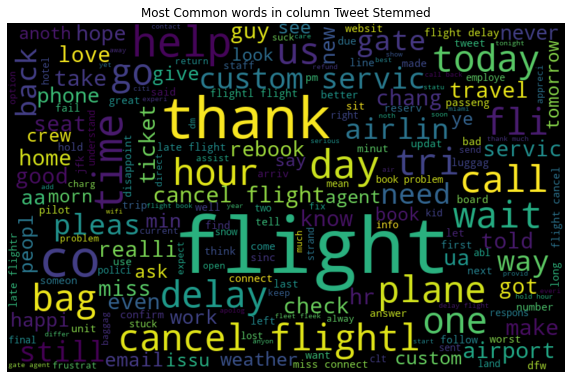

In [300]:
all_words = ' '.join([text for text in df_combine['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

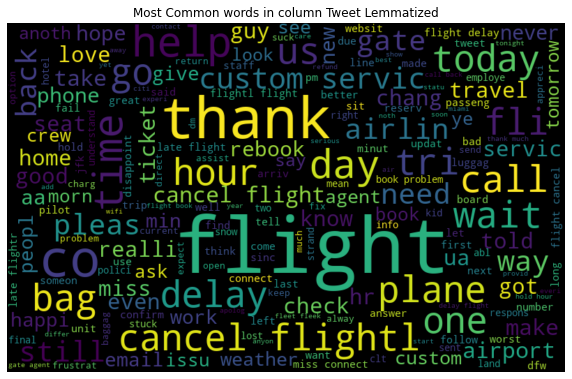

In [301]:
ll_words = ' '.join([text for text in df_combine['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

# **Bag-of-Words Model**

In [302]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [303]:
bow_stem = bow_vectorizer.fit_transform(df_combine['tweet_stemmed'])
bow_stem

<2928x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 18426 stored elements in Compressed Sparse Row format>

In [304]:
bow_lemm = bow_vectorizer.fit_transform(df_combine['tweet_lemmatized'])
bow_lemm

<2928x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 17182 stored elements in Compressed Sparse Row format>

# **TF-IDF Model**

In [305]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [306]:
tfidf_stem = tfidf_vectorizer.fit_transform(df_combine['tweet_stemmed'])
tfidf_stem

<2928x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 18426 stored elements in Compressed Sparse Row format>

In [307]:
tfidf_lemm = tfidf_vectorizer.fit_transform(df_combine['tweet_lemmatized'])
tfidf_lemm

<2928x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 17182 stored elements in Compressed Sparse Row format>

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [309]:
train_bow = bow_stem[:1464 ,:]
test_bow = bow_stem[1464 ,:]

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, df_train['airline_sentiment'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)
prediction = lreg.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)

A1 = f1_score(yvalid, prediction_int)
print(A1)

0.7214611872146119


In [310]:
cr = classification_report(yvalid, prediction_int)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.89      0.61      0.72       263
           1       0.61      0.89      0.72       177

    accuracy                           0.72       440
   macro avg       0.75      0.75      0.72       440
weighted avg       0.78      0.72      0.72       440



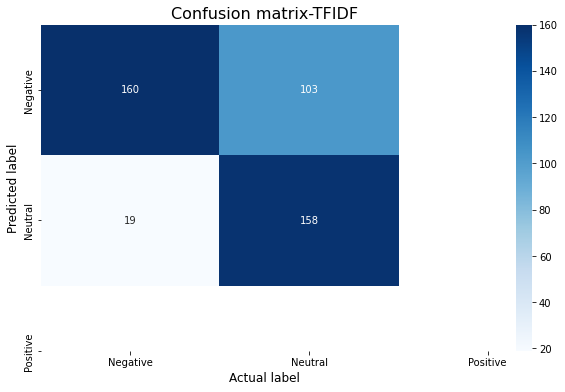

In [311]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(yvalid,prediction_int)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix-TFIDF', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

In [312]:
train_bow = bow_lemm[:1464,:]
test_bow = bow_lemm[1464,:]

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, df_train['airline_sentiment'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)

prediction = lreg.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)

A2 = f1_score(yvalid, prediction_int)
print(A2)

0.7285382830626451


In [313]:
cr = classification_report(yvalid, prediction_int)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.89      0.63      0.74       263
           1       0.62      0.89      0.73       177

    accuracy                           0.73       440
   macro avg       0.76      0.76      0.73       440
weighted avg       0.78      0.73      0.74       440



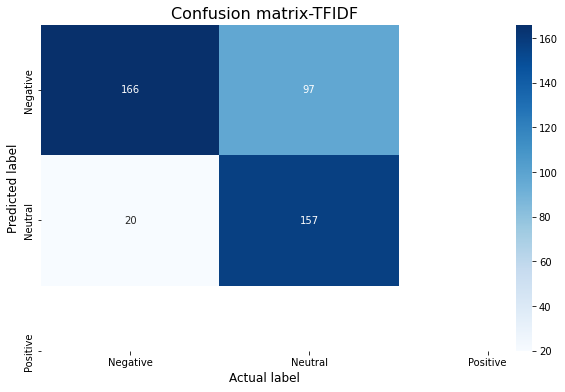

In [314]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(yvalid,prediction_int)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix-TFIDF', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

In [315]:
train_tfidf = tfidf_stem[:1464,:]
test_tfidf = tfidf_stem[1464:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

B1 = f1_score(yvalid, prediction_int) 
print(B1)

0.7033898305084746


In [316]:
cr = classification_report(yvalid, prediction_int)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.92      0.51      0.66       263
           1       0.56      0.94      0.70       177

    accuracy                           0.68       440
   macro avg       0.74      0.72      0.68       440
weighted avg       0.78      0.68      0.68       440



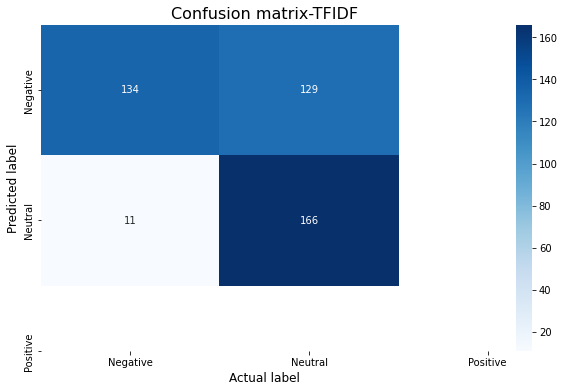

In [317]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(yvalid,prediction_int)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix-TFIDF', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

In [318]:
train_tfidf = tfidf_lemm[:1464,:]
test_tfidf = tfidf_lemm[1464:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

B2 = f1_score(yvalid, prediction_int)
print(B2)

0.7038626609442059


In [319]:
cr = classification_report(yvalid, prediction_int)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.91      0.52      0.67       263
           1       0.57      0.93      0.70       177

    accuracy                           0.69       440
   macro avg       0.74      0.73      0.69       440
weighted avg       0.77      0.69      0.68       440



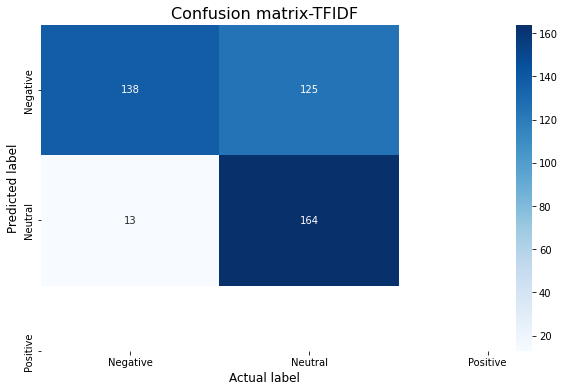

In [320]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(yvalid,prediction_int)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix-TFIDF', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

In [321]:
print("F1 - Score Chart")
print("* F1-Score - Model using Bag-of-Words features")
print("   F1-Score = ",A1," - For column tweets are stemmed")
print("   F1-Score = ",A2," - For column tweets are Lemmatized")
print("* F1-Score - Model using TF-IDF features")
print("   F1-Score = ",B1," - For column tweets are stemmed")
print("   F1-Score = ",B2," - For column tweets are Lemmatized")

F1 - Score Chart
* F1-Score - Model using Bag-of-Words features
   F1-Score =  0.7214611872146119  - For column tweets are stemmed
   F1-Score =  0.7285382830626451  - For column tweets are Lemmatized
* F1-Score - Model using TF-IDF features
   F1-Score =  0.7033898305084746  - For column tweets are stemmed
   F1-Score =  0.7038626609442059  - For column tweets are Lemmatized


## **Random Forest Classifier Model**



In [322]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(xtrain_tfidf, ytrain)

RandomForestClassifier()

In [323]:
random_forest_classifier_prediction =  random_forest_classifier.predict(xvalid_tfidf)

In [324]:
accuracy_score(random_forest_classifier_prediction,yvalid)

0.75

In [325]:
cr = classification_report(yvalid, random_forest_classifier_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       263
           1       0.72      0.61      0.66       177

    accuracy                           0.75       440
   macro avg       0.74      0.73      0.73       440
weighted avg       0.75      0.75      0.75       440



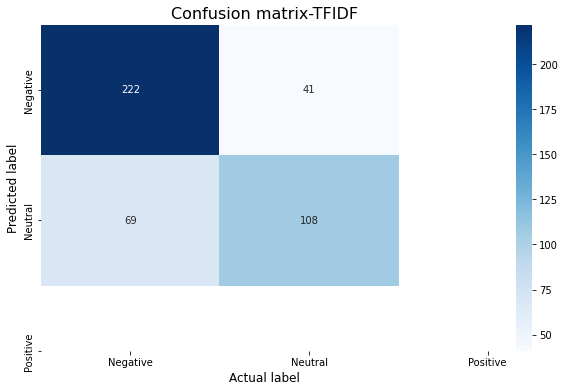

In [326]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(yvalid,random_forest_classifier_prediction)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix-TFIDF', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

# **XGB Classifier Model**

In [327]:
xgb = XGBClassifier()
xgb.fit(xtrain_tfidf, ytrain)

XGBClassifier()

In [328]:
xgb_prediction =  xgb.predict(xvalid_tfidf)

In [329]:
accuracy_score(xgb_prediction,yvalid)

0.7159090909090909

In [330]:
cr = classification_report(yvalid, xgb_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.69      0.95      0.80       263
           1       0.82      0.37      0.51       177

    accuracy                           0.72       440
   macro avg       0.76      0.66      0.66       440
weighted avg       0.75      0.72      0.68       440



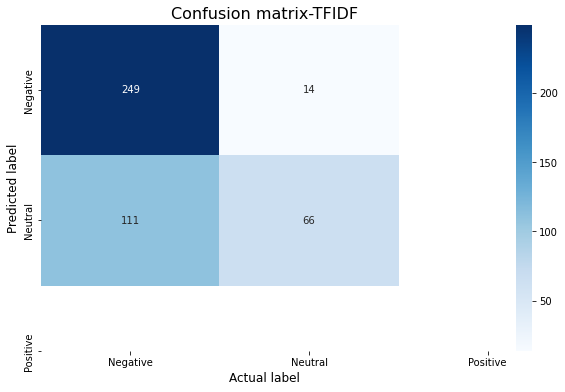

In [331]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(yvalid,xgb_prediction)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix-TFIDF', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

# **Gradient Boosting Classifier Model**

In [332]:
gbc = GradientBoostingClassifier()
gbc.fit(xtrain_tfidf, ytrain)

GradientBoostingClassifier()

In [333]:
gbc_prediction =  gbc.predict(xvalid_tfidf)

In [334]:
accuracy_score(gbc_prediction,yvalid)

0.7227272727272728

In [335]:
cr = classification_report(yvalid, gbc_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.70      0.93      0.80       263
           1       0.80      0.41      0.54       177

    accuracy                           0.72       440
   macro avg       0.75      0.67      0.67       440
weighted avg       0.74      0.72      0.70       440



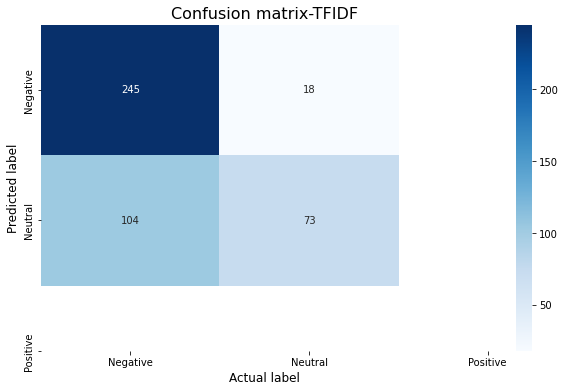

In [336]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(yvalid,gbc_prediction)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix-TFIDF', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

# **Decision Tree Classifier Model**

In [337]:
des_tree_classifier = DecisionTreeClassifier()
des_tree_classifier.fit(xtrain_tfidf, ytrain)

DecisionTreeClassifier()

In [338]:
des_tree_classifier_prediction=des_tree_classifier.predict(xtrain_tfidf)

In [339]:
accuracy_score(des_tree_classifier_prediction,ytrain)

0.994140625

In [340]:
cr = classification_report(ytrain, des_tree_classifier_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       655
           1       0.99      1.00      0.99       369

    accuracy                           0.99      1024
   macro avg       0.99      0.99      0.99      1024
weighted avg       0.99      0.99      0.99      1024



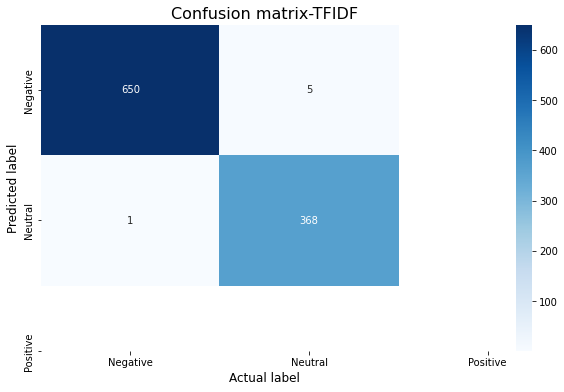

In [341]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(ytrain,des_tree_classifier_prediction)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix-TFIDF', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()